In [1]:
# Importing libraries and modules of Python Required for Creating ML Models and their Analysis:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
# Importing the cleaned data from CSV File found after Data Cleaning:

df = pd.read_csv("C:/Users/Yash/Downloads/Employment_Prediction_ML_Project.csv")

In [3]:
df.head()

,Gender,SSC_Per,SSC_Board,HSC_Per,HSC_Board,HSC_Stream,Degree_Per,Degree_Stream,Work_Exp,Entrance_Perc,Specialisation,MBA_Per,Status,Salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000


# Scaling the Numerical columns and Encoding the Categorical Ones:

In [4]:
# Making lists having names of Numerical and Categorical columns:

num = []
cat = []

for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)
        
print(num,cat)

['SSC_Per', 'HSC_Per', 'Degree_Per', 'Entrance_Perc', 'MBA_Per', 'Salary'] ['Gender', 'SSC_Board', 'HSC_Board', 'HSC_Stream', 'Degree_Stream', 'Work_Exp', 'Specialisation', 'Status']


In [5]:
# Removing Status and Salary from the lists as these are the target variables and need not to be scaled or encoded:

num.remove('Salary')
cat.remove('Status')

In [6]:
# Scaling the rest of the numerical columns using Standard Scaler:

In [7]:
StSc = StandardScaler()

df[num] = StSc.fit_transform(df[num])

In [8]:
df[num]

,SSC_Per,HSC_Per,Degree_Per,Entrance_Perc,MBA_Per
0,-0.014312,2.259695,-1.132160,-1.291192,-0.593321
1,1.134122,1.099352,1.512604,1.088418,0.693365
2,-0.200595,0.153312,-0.317551,0.219671,-0.765338
3,-1.038868,-1.311999,-1.946768,-0.460218,-0.484950
4,1.736747,0.666170,0.945093,1.866512,-1.160977
...,...,...,...,...,...
208,1.252411,1.435458,1.528896,1.428362,2.105624
209,-0.852585,-0.579344,0.768594,0.144128,-1.484368
210,-0.014312,0.061730,0.904362,-0.989020,1.285103
211,0.637678,-0.029852,-1.132160,-0.158045,-0.347337


In [9]:
# Labelling Placed and Not Placed as 1 and 0 in Status column and changing dtype to integer:

df["Status"] = df["Status"].replace(["Placed","Not Placed"],['1','0'])

df["Status"] = df["Status"].astype('int64')

In [10]:
# Encoding other Categorical columns using One Hot Encoding:

df = pd.get_dummies(data = df, columns = cat, drop_first = True)

In [11]:
df.head()

,SSC_Per,HSC_Per,Degree_Per,Entrance_Perc,MBA_Per,Status,Salary,Gender_M,SSC_Board_Others,HSC_Board_Others,HSC_Stream_Commerce,HSC_Stream_Science,Degree_Stream_Others,Degree_Stream_Sci&Tech,Work_Exp_Yes,Specialisation_Mkt&HR
0,-0.014312,2.259695,-1.132160,-1.291192,-0.593321,1,270000,1,1,1,1,0,0,1,0,1
1,1.134122,1.099352,1.512604,1.088418,0.693365,1,200000,1,0,1,0,1,0,1,1,0
2,-0.200595,0.153312,-0.317551,0.219671,-0.765338,1,250000,1,0,0,0,0,0,0,0,0
3,-1.038868,-1.311999,-1.946768,-0.460218,-0.484950,0,0,1,0,0,0,1,0,1,0,1
4,1.736747,0.666170,0.945093,1.866512,-1.160977,1,425000,1,0,0,1,0,0,0,0,0


# Creating Linear Regression model to predict the Salary of the people and doing analysis on the same:

In [13]:
# Assigning LinearRegression model to an Object named lr:

lr = LinearRegression()

In [15]:
# Splitting the Data into Features and Labels:
# Removing Status column also from features as it can create biasness in salary prediction:

X = df.drop(["Salary","Status"], axis = 1)
Y = df["Salary"]

In [17]:
# Splitting the Features and Labels into Training and Testing Datasets:

Xtr, Xts, Ytr, Yts = train_test_split(X,Y, test_size = 0.3)

In [18]:
# Training the Model on the Training dataset:

lr.fit(Xtr,Ytr)

LinearRegression()

In [19]:
# Predicting the Salary of Testing dataset:

Ypred = lr.predict(Xts)

In [76]:
# Checking for R2 score of the model:

metrics.r2_score(Yts,Ypred)

# Around 96% R2 score.

96.0

In [33]:
lr.score(Xts,Ypred)

1.0

In [77]:
lr.score(Xts,Yts)

96.0

# Creating Logistic Regression model to predict the Employment Status of the people and doing analysis on the same:

In [40]:
# Assigning LogisticRegression model to an Object named lgr:

lgr = LogisticRegression()

In [41]:
# Splitting the Data into Features and Labels:
# Removing Salary column also from features as it can create biasness in status prediction:

x = df.drop(["Salary","Status"],axis = 1)
y = df["Status"]

In [42]:
# Splitting the Features and Labels into Training and Testing Datasets:

xtr, xts, ytr, yts = train_test_split(x,y, test_size = 0.3)

In [43]:
# Training the Model on the Training dataset:

lgr.fit(xtr,ytr)

LogisticRegression()

In [46]:
# Predicting the Status of Testing dataset:

ypred = lgr.predict(xts)

In [50]:
# Checking for Accuracy score of the model:

metrics.accuracy_score(yts,ypred)

# Around 84% Accuracy score.

0.84375

In [47]:
lgr.score(xts,yts)

0.84375

In [48]:
lgr.score(xts,ypred)

1.0

<AxesSubplot:>

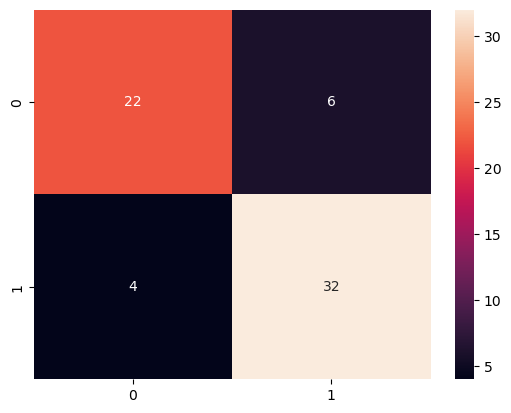

In [81]:
# Plotting heatmap to check values of confusion matrix (TP,FP,FN,TN):

sns.heatmap(metrics.confusion_matrix(yts,ypred),annot = True)

In [82]:
# Printing Classification report of the model:

print(metrics.classification_report(yts,ypred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.84      0.89      0.86        36

    accuracy                           0.84        64
   macro avg       0.84      0.84      0.84        64
weighted avg       0.84      0.84      0.84        64



# Creating Decision Tree model to predict the Employment Status of the people and doing analysis on the same:

In [ ]:
# Assigning Decision Tree model to an Object named dt:

In [52]:
dt = DecisionTreeClassifier()

In [53]:
# Using previously splitted testing and training data as it's same:

dt.fit(xtr,ytr)

DecisionTreeClassifier()

In [54]:
# Predicting the Status of Testing dataset:

ypred2 = dt.predict(xts)

In [55]:
# Checking for Accuracy score of the model:

metrics.accuracy_score(yts,ypred2)

# Around 72% Accuracy score.

0.71875

In [56]:
dt.score(xts,yts)

0.71875

In [57]:
dt.score(xts,ypred)

0.8125

In [60]:
# Printing Classification report of the model:

print(metrics.classification_report(yts,ypred2))

              precision    recall  f1-score   support

           0       0.71      0.61      0.65        28
           1       0.72      0.81      0.76        36

    accuracy                           0.72        64
   macro avg       0.72      0.71      0.71        64
weighted avg       0.72      0.72      0.72        64



<AxesSubplot:>

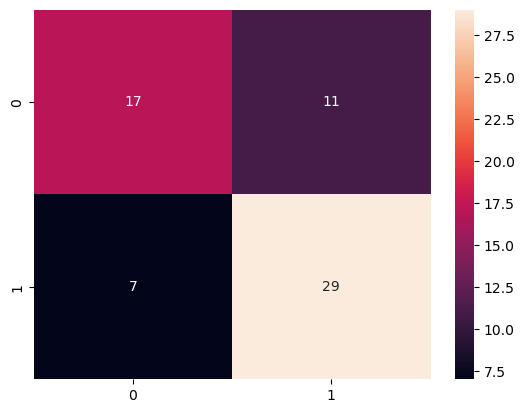

In [61]:
# Plotting heatmap to check values of confusion matrix (TP,FP,FN,TN):

sns.heatmap(metrics.confusion_matrix(yts,ypred2),annot = True)

# Creating Random Forest model to predict the Employment Status of the people and doing analysis on the same:

In [63]:
# Assigning Random Forest model to an Object named rf:

rf = RandomForestClassifier()

In [64]:
# Using previously splitted testing and training data as it's same:

rf.fit(xtr,ytr)

RandomForestClassifier()

In [65]:
# Predicting the Status of Testing dataset:

ypred3 = rf.predict(xts)

In [67]:
# Checking for Accuracy score of the model:

metrics.accuracy_score(yts,ypred3)

# Around 80% Accuracy score.

0.796875

In [70]:
dt.score(xts,yts)

0.71875

In [71]:
dt.score(xts,ypred3)

0.828125

<AxesSubplot:>

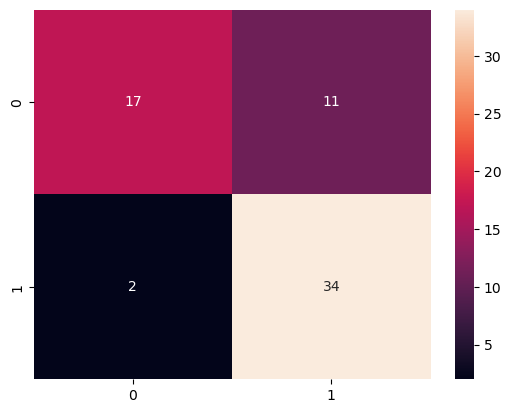

In [69]:
# Plotting heatmap to check values of confusion matrix (TP,FP,FN,TN):

sns.heatmap(metrics.confusion_matrix(yts,ypred3),annot = True)

In [83]:
# Printing Classification report of the model:

print(metrics.classification_report(yts,ypred3))

              precision    recall  f1-score   support

           0       0.89      0.61      0.72        28
           1       0.76      0.94      0.84        36

    accuracy                           0.80        64
   macro avg       0.83      0.78      0.78        64
weighted avg       0.82      0.80      0.79        64



# Conclusion:

#### 1. Linear Regression Model is suitable for Predicting Salary as the R2 Score is found around 96%, when tested, which is suitable.

#### 2. For Predicting the Employement Status, Logistic Regression Model is better as it shows the highest accuracy, around 84%.  TPR is also higher (22), compared to others (having 17).

In [78]:
# Accuracy of Logistic Regression Model:

metrics.accuracy_score(yts,ypred)

0.84375

In [79]:
# Accuracy of Decision Tree Model:

metrics.accuracy_score(yts,ypred2)

0.71875

In [80]:
# Accuracy of Random Forest Model:

metrics.accuracy_score(yts,ypred3)

0.796875